In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
agg = pd.read_csv('./Input/AGG.csv')
jnk = pd.read_csv('./Input/jnk.csv') 
spy = pd.read_csv('./Input/SPY.csv') 

# Convert 'Date' columns to datetime
agg['Date'] = pd.to_datetime(agg['Date'])
jnk['Date'] = pd.to_datetime(jnk['Date'])
spy['Date'] = pd.to_datetime(spy['Date'])

start_date = '2014-06-16'
end_date = '2024-06-14'
# filter the Date from 2014-06-16 to 2024-06-14
agg = agg[(agg['Date'] >= start_date) & (agg['Date'] <= end_date)]
jnk = jnk[(jnk['Date'] >= start_date) & (jnk['Date'] <= end_date)]
spy = spy[(spy['Date'] >= start_date) & (spy['Date'] <= end_date)]


In [3]:
# Calculate daily returns
agg['DailyReturn'] = agg['Adj Close'].pct_change()
jnk['DailyReturn'] = jnk['Adj Close'].pct_change()
spy['DailyReturn'] = spy['Adj Close'].pct_change()

# Calculate cumulative returns
agg['cumret'] = (1 + agg['DailyReturn']).cumprod() - 1
jnk['cumret'] = (1 + jnk['DailyReturn']).cumprod() - 1
spy['cumret'] = (1 + spy['DailyReturn']).cumprod() - 1

# Calculate log returns
agg['LogReturn'] = np.log(agg['Adj Close'] / agg['Adj Close'].shift(1))
jnk['LogReturn'] = np.log(jnk['Adj Close'] / jnk['Adj Close'].shift(1))
spy['LogReturn'] = np.log(spy['Adj Close'] / spy['Adj Close'].shift(1))

In [4]:
agg.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,DailyReturn,cumret,LogReturn
0,2014-06-16,108.870003,108.959999,108.800003,108.820000,84.850655,1308900,NaN,NaN,NaN
1,2014-06-17,108.760002,108.790001,108.610001,108.620003,84.694695,842300,-0.001838,-0.001838,-0.001840
2,2014-06-18,108.730003,108.910004,108.639999,108.910004,84.920784,504400,0.002669,0.000826,0.002666
3,2014-06-19,109.000000,109.029999,108.680000,108.750000,84.796043,690000,-0.001469,-0.000644,-0.001470
4,2014-06-20,108.730003,108.940002,108.730003,108.940002,84.944199,690600,0.001747,0.001102,0.001746
5,2014-06-23,108.989998,109.019997,108.839996,108.839996,84.866219,559700,-0.000918,0.000183,-0.000918
6,2014-06-24,108.959999,109.050003,108.879997,109.029999,85.014366,740800,0.001746,0.001929,0.001744
7,2014-06-25,109.199997,109.279999,109.110001,109.180000,85.131363,713700,0.001376,0.003308,0.001375
8,2014-06-26,109.250000,109.410004,109.250000,109.389999,85.295052,673700,0.001923,0.005237,0.001921
9,2014-06-27,109.449997,109.500000,109.349998,109.389999,85.295052,668200,0.000000,0.005237,0.000000


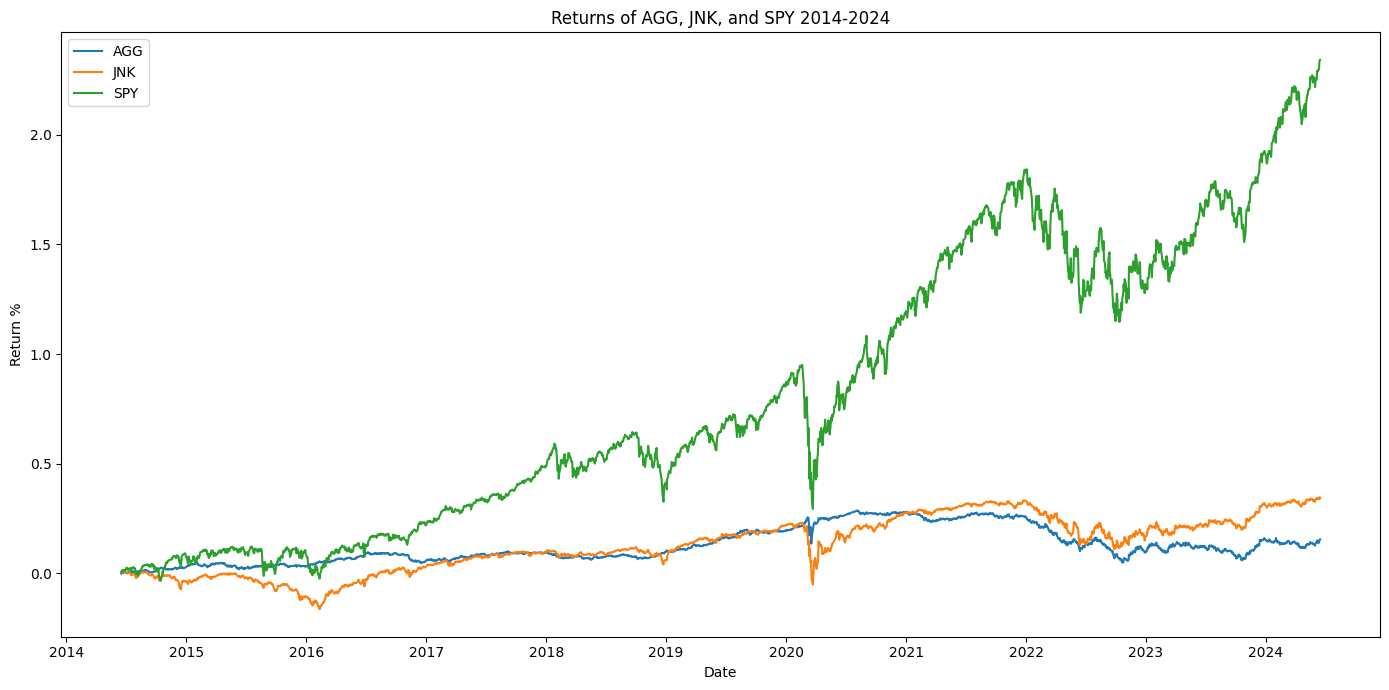

In [5]:
# Plotting
plt.figure(figsize=(14, 7))

plt.plot(agg['Date'], agg['cumret'], label='AGG')
plt.plot(jnk['Date'], jnk['cumret'], label='JNK')
plt.plot(spy['Date'], spy['cumret'], label='SPY')

plt.title('Returns of AGG, JNK, and SPY 2014-2024')
plt.xlabel('Date')
plt.ylabel('Return %')
plt.legend()

plt.tight_layout()
plt.show()

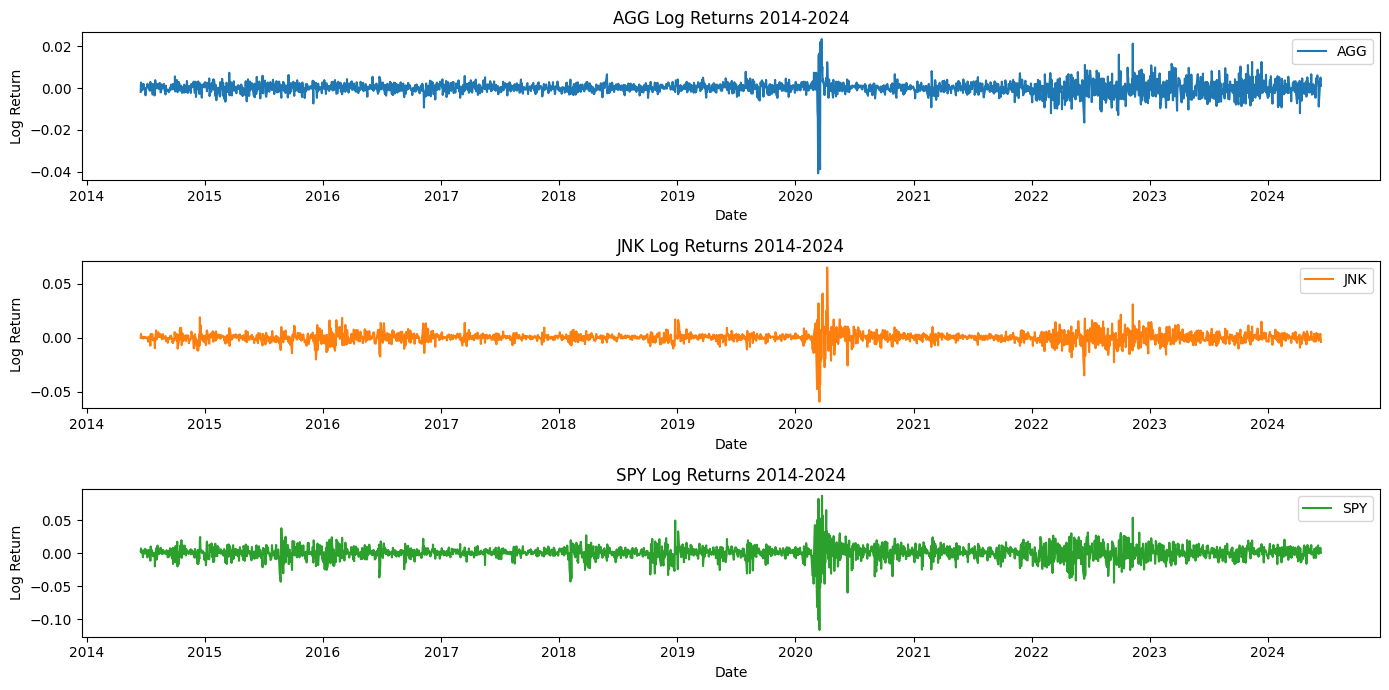

In [6]:
# Retrieve the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plotting
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(agg['Date'], agg['LogReturn'], label='AGG', color=default_colors[0])
plt.title('AGG Log Returns 2014-2024')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(jnk['Date'], jnk['LogReturn'], label='JNK', color=default_colors[1])
plt.title('JNK Log Returns 2014-2024')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(spy['Date'], spy['LogReturn'], label='SPY', color=default_colors[2])
plt.title('SPY Log Returns 2014-2024')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

plt.tight_layout()
plt.show()

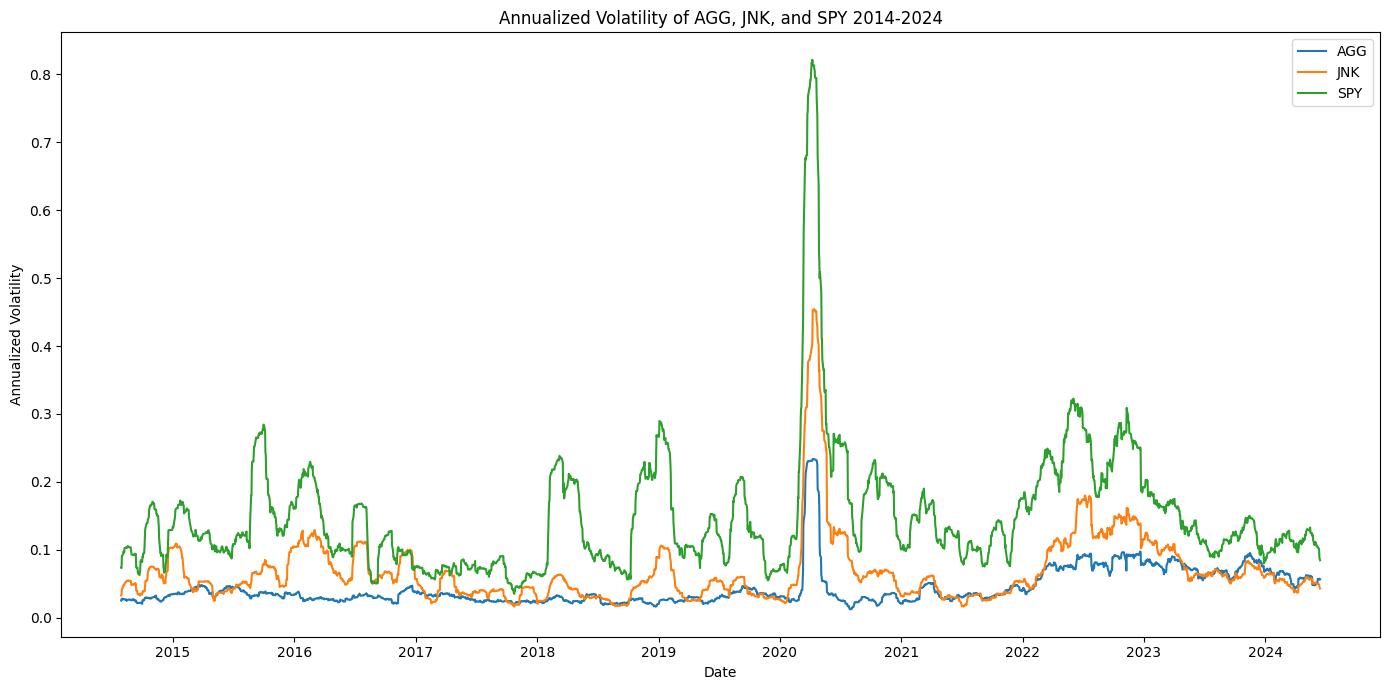

In [7]:
# calculate the annualized volatility for each etf
# calculate the annualized volatility for each etf with a 30-day rolling window
window_size = 30
agg['Volatility'] = agg['DailyReturn'].rolling(window=window_size).std() * np.sqrt(252)
jnk['Volatility'] = jnk['DailyReturn'].rolling(window=window_size).std() * np.sqrt(252)
spy['Volatility'] = spy['DailyReturn'].rolling(window=window_size).std() * np.sqrt(252)

# Plotting the annualized volatility
plt.figure(figsize=(14, 7))

plt.plot(agg['Date'], agg['Volatility'], label='AGG')
plt.plot(jnk['Date'], jnk['Volatility'], label='JNK')
plt.plot(spy['Date'], spy['Volatility'], label='SPY')

plt.title('Annualized Volatility of AGG, JNK, and SPY 2014-2024')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
# Calculate the cumulative maximum of the adjusted close prices
agg['CumulativeMax'] = agg['Adj Close'].cummax()
jnk['CumulativeMax'] = jnk['Adj Close'].cummax()
spy['CumulativeMax'] = spy['Adj Close'].cummax()

# Calculate the drawdown
agg['Drawdown'] = (agg['Adj Close'] - agg['CumulativeMax']) / agg['CumulativeMax']
jnk['Drawdown'] = (jnk['Adj Close'] - jnk['CumulativeMax']) / jnk['CumulativeMax']
spy['Drawdown'] = (spy['Adj Close'] - spy['CumulativeMax']) / spy['CumulativeMax']

# Calculate the maximum drawdown
agg_max_drawdown = agg['Drawdown'].min()
jnk_max_drawdown = jnk['Drawdown'].min()
spy_max_drawdown = spy['Drawdown'].min()

agg_max_drawdown_date = agg['Date'][agg['Drawdown'].idxmin()].strftime('%Y-%m-%d')
jnk_max_drawdown_date = jnk['Date'][jnk['Drawdown'].idxmin()].strftime('%Y-%m-%d')
spy_max_drawdown_date = spy['Date'][spy['Drawdown'].idxmin()].strftime('%Y-%m-%d')

print(f"AGG Max Drawdown: {agg_max_drawdown:.2%}   Date: {agg_max_drawdown_date}")
print(f"JNK Max Drawdown: {jnk_max_drawdown:.2%}   Date: {jnk_max_drawdown_date}")
print(f"SPY Max Drawdown: {spy_max_drawdown:.2%}   Date: {spy_max_drawdown_date}")

AGG Max Drawdown: -18.43%   Date: 2022-10-20
JNK Max Drawdown: -22.89%   Date: 2020-03-23
SPY Max Drawdown: -33.72%   Date: 2020-03-23


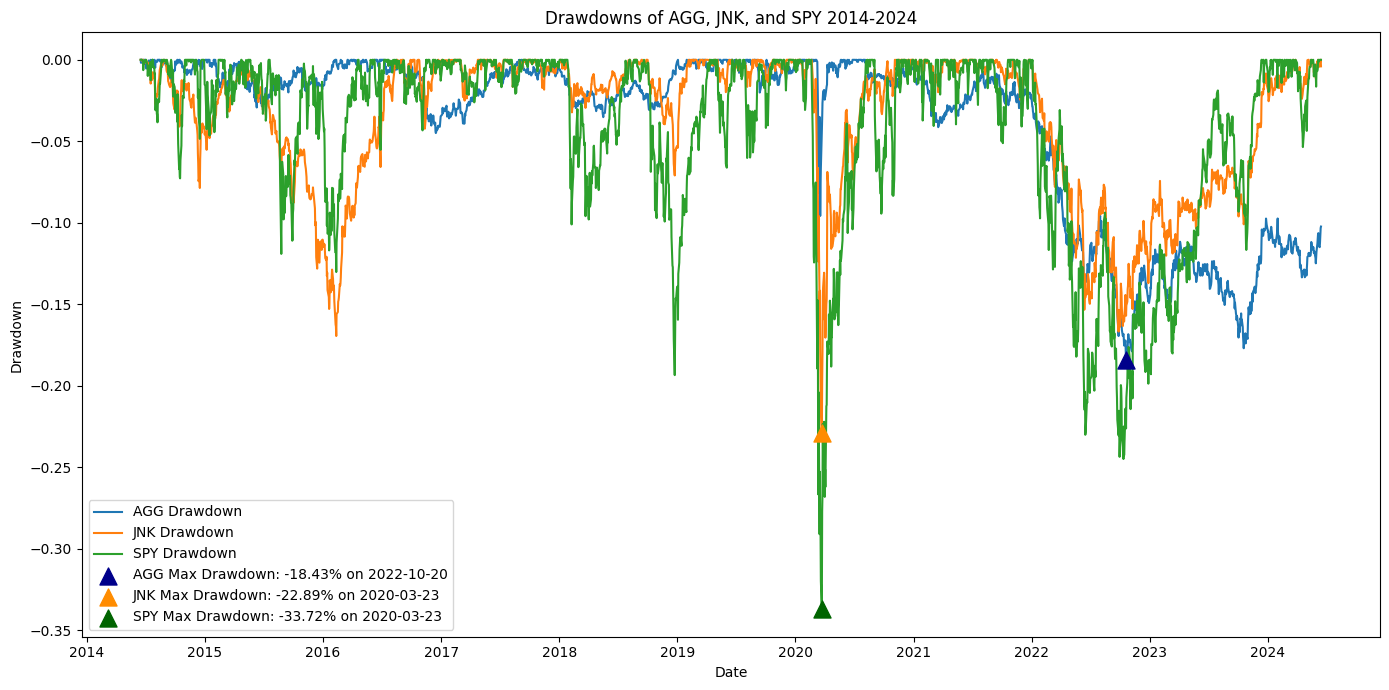

In [9]:
# Plotting the drawdowns
plt.figure(figsize=(14, 7))

agg_max_drawdown_date = pd.to_datetime(agg['Date'][agg['Drawdown'].idxmin()])
jnk_max_drawdown_date = pd.to_datetime(jnk['Date'][jnk['Drawdown'].idxmin()])
spy_max_drawdown_date = pd.to_datetime(spy['Date'][spy['Drawdown'].idxmin()])

plt.plot(agg['Date'], agg['Drawdown'], label='AGG Drawdown')
plt.plot(jnk['Date'], jnk['Drawdown'], label='JNK Drawdown')
plt.plot(spy['Date'], spy['Drawdown'], label='SPY Drawdown')

# Add distinguishable markers for max drawdowns
plt.scatter(agg_max_drawdown_date, agg_max_drawdown, color='darkblue', marker='^', s=150, zorder=5, label=f'AGG Max Drawdown: {agg_max_drawdown:.2%} on {agg_max_drawdown_date.strftime("%Y-%m-%d")}')
plt.scatter(jnk_max_drawdown_date, jnk_max_drawdown, color='darkorange', marker='^', s=150, zorder=5, label=f'JNK Max Drawdown: {jnk_max_drawdown:.2%} on {jnk_max_drawdown_date.strftime("%Y-%m-%d")}')
plt.scatter(spy_max_drawdown_date, spy_max_drawdown, color='darkgreen', marker='^', s=150, zorder=5, label=f'SPY Max Drawdown: {spy_max_drawdown:.2%} on {spy_max_drawdown_date.strftime("%Y-%m-%d")}')

plt.title('Drawdowns of AGG, JNK, and SPY 2014-2024')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
agg['Drawdown'].loc[agg['Date'] == jnk_max_drawdown_date]

1452   -0.04429
Name: Drawdown, dtype: float64

Both of JNK(High-yield bond) and SPY(S&P 500) have experienced the max drawdown in 2020-03-23 with -22.89% and -33.72%. Wheras the AGG(S&P 500 Index)'s drawdown on the same date is only -4.4%. It shows the ensurance and capability of investment-level bonds to withstand the downside risk of market volatility to offset the risk of the equity market.

In [11]:
# # Calculate the correlation matrix for daily returns
# returns = pd.DataFrame({
#     'AGG': agg['DailyReturn'],
#     'JNK': jnk['DailyReturn'],
#     'SPY': spy['DailyReturn']
# })

# returns_corr = returns.corr()
# print("Correlation of Daily Returns:")
# print(returns_corr)


# # Calculate the correlation matrix for volatility
# volatility = pd.DataFrame({
#     'AGG': agg['Volatility'],
#     'JNK': jnk['Volatility'],
#     'SPY': spy['Volatility']
# })

# volatility_corr = volatility.corr()
# print("Correlation of Volatility:")
# print(volatility_corr)

Compare the performance of portfolios with different allocations to equities, high-yield bonds, and investment-grade bonds, particularly focusing on how they perform during market upsides and downsides.

To align with your hypothesis, you should consider the following:
1. Upside Performance: A portfolio with a higher allocation to equities should benefit more during market upswings.
2. Downside Protection: A portfolio with a higher allocation to investment-grade bonds should provide better protection during market downturns compared to high-yield bonds.

In [45]:
# Define portfolio allocations
allocations_A = {'Equities': 0.10, 'HighYieldBonds': 0.4, 'InvGradeBonds': 0.5}
allocations_B = {'Equities': 0.15, 'HighYieldBonds': 0.0, 'InvGradeBonds': 0.85}
allocations_C = {'Equities': 0.10, 'HighYieldBonds': 0.0, 'InvGradeBonds': 0.9}
allocations_D = {'Equities': 0.15, 'HighYieldBonds': 0.35, 'InvGradeBonds': 0.5}

portfolio_return_A = (allocations_A['Equities'] * spy['DailyReturn'].mean() + allocations_A['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_A['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
portfolio_return_B = (allocations_B['Equities'] * spy['DailyReturn'].mean() + allocations_B['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_B['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
portfolio_return_C = (allocations_C['Equities'] * spy['DailyReturn'].mean() + allocations_C['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_C['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
portfolio_return_D = (allocations_D['Equities'] * spy['DailyReturn'].mean() + allocations_D['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_D['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
# portfolio_return_E = (allocations_E['Equities'] * spy['DailyReturn'].mean() + allocations_E['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_E['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252
# portfolio_return_F = (allocations_F['Equities'] * spy['DailyReturn'].mean() + allocations_F['HighYieldBonds'] * jnk['DailyReturn'].mean() + allocations_F['InvGradeBonds'] * agg['DailyReturn'].mean()) * 252


print(f"Portfolio A Return: {portfolio_return_A:.2%}")
print(f"Portfolio B Return: {portfolio_return_B:.2%}")
print(f"Portfolio C Return: {portfolio_return_C:.2%}")
print(f"Portfolio D Return: {portfolio_return_D:.2%}")
# print(f"Portfolio E Return: {portfolio_return_E:.2%}")
# print(f"Portfolio F Return: {portfolio_return_F:.2%}")

Portfolio A Return: 3.47%
Portfolio B Return: 3.38%
Portfolio C Return: 2.78%
Portfolio D Return: 3.99%


In [46]:
# Create a DataFrame using the allocation variables
allocations_df = pd.DataFrame({
    'Asset': ['Equities', 'HighYieldBonds', 'InvGradeBonds'],
    'ETFs': ['SPY', 'JNK', 'AGG'],
    'Allocation_A': [allocations_A['Equities'], allocations_A['HighYieldBonds'], allocations_A['InvGradeBonds']],
    'Allocation_B': [allocations_B['Equities'], allocations_B['HighYieldBonds'], allocations_B['InvGradeBonds']],
    'Allocation_C': [allocations_C['Equities'], allocations_C['HighYieldBonds'], allocations_C['InvGradeBonds']],
    'Allocation_D': [allocations_D['Equities'], allocations_D['HighYieldBonds'], allocations_D['InvGradeBonds']]
})

In [49]:
allocations_df

,Asset,ETFs,Allocation_A,Allocation_B,Allocation_C,Allocation_D
0,Equities,SPY,0.1,0.15,0.1,0.15
1,HighYieldBonds,JNK,0.4,0.00,0.0,0.35
2,InvGradeBonds,AGG,0.5,0.85,0.9,0.50


In [24]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# Function with SPY as benchmark

# def backtest_portfolios(allocations_df, backtest_start_date, backtest_end_date):
#     cumulative_returns_dict = {}

#     for allocation_name in allocations_df.columns[2:]:  # Skip 'Asset' and 'ETFs' columns
#         # Extract the allocation values from allocations_df
#         allocations = {
#             'Equities': allocations_df.loc[allocations_df['Asset'] == 'Equities', allocation_name].values[0],
#             'HighYieldBonds': allocations_df.loc[allocations_df['Asset'] == 'HighYieldBonds', allocation_name].values[0],
#             'InvGradeBonds': allocations_df.loc[allocations_df['Asset'] == 'InvGradeBonds', allocation_name].values[0]
#         }

#         # Filter the data for the backtest period
#         agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
#         jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
#         spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

#         # Align the indices
#         combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
#         agg_backtest = agg_backtest.loc[combined_index]
#         jnk_backtest = jnk_backtest.loc[combined_index]
#         spy_backtest = spy_backtest.loc[combined_index]

#         # Calculate portfolio daily returns
#         portfolio_daily_returns = (
#             allocations['Equities'] * spy_backtest['DailyReturn'] +
#             allocations['HighYieldBonds'] * jnk_backtest['DailyReturn'] +
#             allocations['InvGradeBonds'] * agg_backtest['DailyReturn']
#         )

#         # Compute cumulative returns
#         portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()
#         cumulative_returns_dict[allocation_name] = portfolio_cumulative_returns

#     # Plot all cumulative returns on the same plot
#     plt.figure(figsize=(14, 7))
#     for allocation_name, cumulative_returns in cumulative_returns_dict.items():
#         plt.plot(combined_index, cumulative_returns, label=f'Portfolio {allocation_name}')
#     plt.plot(combined_index, (1 + spy_backtest['DailyReturn']).cumprod(), label='SPY (Benchmark)', color=default_colors[2])
#     plt.title('Cumulative Returns: Portfolios vs SPY')
#     plt.xlabel('Date')
#     plt.ylabel('Cumulative Returns')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

#     return cumulative_returns_dict

# # Call the function and print the results
# start_date = '2014-06-17'
# end_date = '2024-06-14'
# cumulative_returns_dict = backtest_portfolios(allocations_df, start_date, end_date)

In [50]:
def backtest_portfolios(allocations_df, backtest_start_date, backtest_end_date):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    cumulative_returns_dict = {}
    portfolio_daily_returns_dict = {}

    for allocation_name in allocations_df.columns[2:]:  # Skip 'Asset' and 'ETFs' columns
        # Extract the allocation values from allocations_df
        allocations = {
            'Equities': allocations_df.loc[allocations_df['Asset'] == 'Equities', allocation_name].values[0],
            'HighYieldBonds': allocations_df.loc[allocations_df['Asset'] == 'HighYieldBonds', allocation_name].values[0],
            'InvGradeBonds': allocations_df.loc[allocations_df['Asset'] == 'InvGradeBonds', allocation_name].values[0]
        }

        # Filter the data for the backtest period
        agg_backtest = agg[(agg['Date'] >= backtest_start_date) & (agg['Date'] <= backtest_end_date)].set_index('Date')
        jnk_backtest = jnk[(jnk['Date'] >= backtest_start_date) & (jnk['Date'] <= backtest_end_date)].set_index('Date')
        spy_backtest = spy[(spy['Date'] >= backtest_start_date) & (spy['Date'] <= backtest_end_date)].set_index('Date')

        # Align the indices
        combined_index = agg_backtest.index.intersection(jnk_backtest.index).intersection(spy_backtest.index)
        agg_backtest = agg_backtest.loc[combined_index]
        jnk_backtest = jnk_backtest.loc[combined_index]
        spy_backtest = spy_backtest.loc[combined_index]

        # Calculate portfolio daily returns
        portfolio_daily_returns = (
            allocations['Equities'] * spy_backtest['DailyReturn'] +
            allocations['HighYieldBonds'] * jnk_backtest['DailyReturn'] +
            allocations['InvGradeBonds'] * agg_backtest['DailyReturn']
        )

        # Compute cumulative returns
        portfolio_cumulative_returns = (1 + portfolio_daily_returns).cumprod()
        cumulative_returns_dict[allocation_name] = portfolio_cumulative_returns
        
        portfolio_daily_returns_dict[allocation_name] = portfolio_daily_returns
        

    # Plot all cumulative returns on the same plot
    plt.figure(figsize=(14, 7))
    for allocation_name, cumulative_returns in cumulative_returns_dict.items():
        plt.plot(combined_index, cumulative_returns, label=f'Portfolio {allocation_name}')
    plt.title('Cumulative Returns: Portfolios with different allocation for Equity, Investment-level Bonds, High-Yield Bonds')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return  portfolio_daily_returns_dict #cumulative_returns_dict

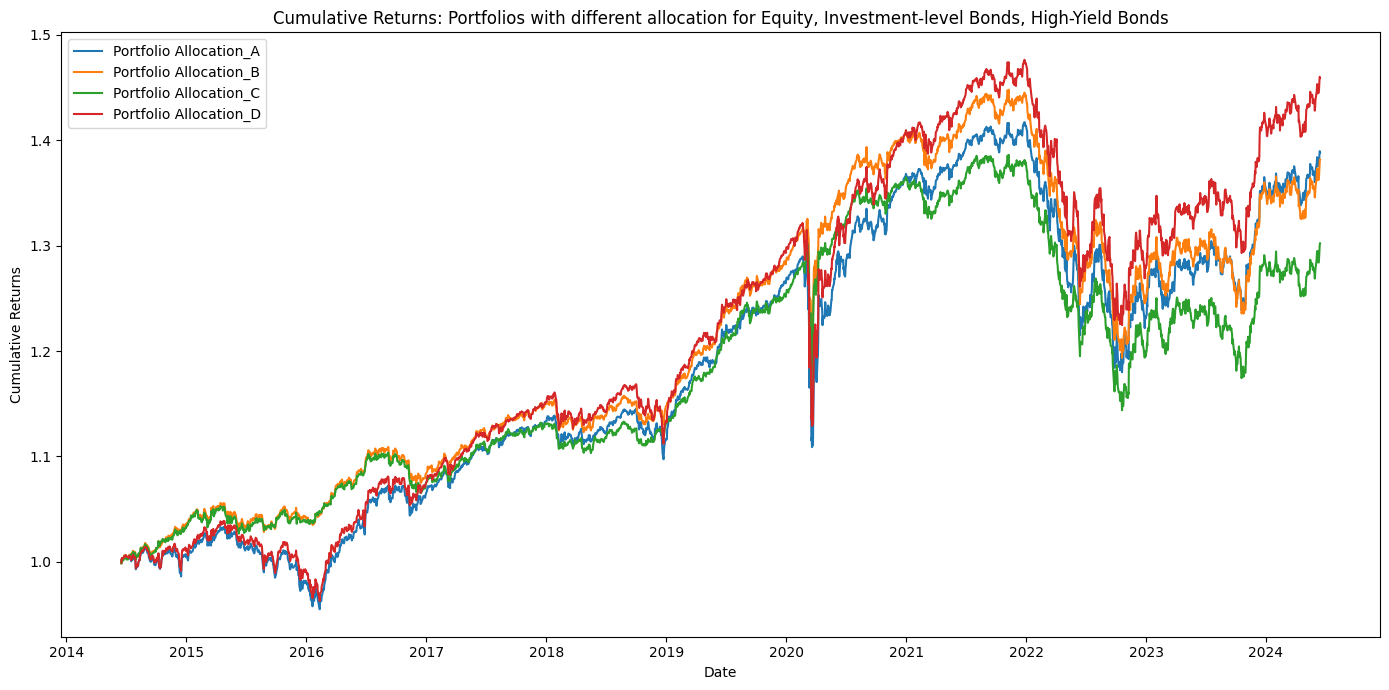

In [51]:
# Call the function and print the results
start_date = '2014-06-16'
end_date = '2024-06-14'
portfolio_daily_returns_dict = backtest_portfolios(allocations_df, start_date, end_date)

In [41]:
def calculate_performance_metrics(returns):
    cumulative_returns = (1 + returns).cumprod()
    end_return = cumulative_returns.iloc[-1] - 1
    annualized_return = np.mean(returns) * 252
    annualized_volatility = np.std(returns) * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility
    running_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns - running_max) / running_max
    max_drawdown = drawdown.min()

    return end_return, annualized_return, annualized_volatility, sharpe_ratio, max_drawdown

In [53]:
# Iterate over each allocation's returns and calculate performance metrics
performance_metrics = {}
for allocation_name, returns in portfolio_daily_returns_dict.items():
    performance_metrics[allocation_name] = calculate_performance_metrics(returns)

# Convert the performance metrics dictionary to a DataFrame
performance_df = pd.DataFrame(performance_metrics, index=['End Return', 'Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Max Drawdown']).T

# Print the DataFrame
performance_df

,End Return,Annualized Return,Annualized Volatility,Sharpe Ratio,Max Drawdown
Allocation_A,0.388027,0.034698,0.061061,0.568246,-0.167336
Allocation_B,0.381470,0.033791,0.053495,0.631670,-0.175615
Allocation_C,0.302102,0.027763,0.051524,0.538832,-0.174679
Allocation_D,0.458761,0.039859,0.064000,0.622798,-0.170367
